# Computational Science

## Imports 

In [65]:
import pandas as pd #Import Pandas for Dataframes
import seaborn as sns #Import Seaborn for Graphs
import numpy as np #Import numpy for arrays
import math # Import Math for Sqrt,cos and Sin
import random # Import Random for Random Number Generation
import matplotlib.pyplot as plt #Plot Graphs
import pandas as pd
from sklearn import preprocessing
import numpy as np

# Part 1: Simulating the Robot in 2D Space

## Eulers Algorithm

In [66]:
def EulersEquation(U,x): # Eulers Equation  F = -2X+2U used to calulate the value of x in the full algorithm 
    f = -2*x +2*U #Performs the equation 
    return f # Returns the value
   

def IntergationCount (h,i): # Integration Count is used to calulate the difference between the Step size and the sample integral
    OGStep = h # Sets the Original Step size to the value of the step size (this changes later so needs to be constant)
    Count  = 0 # Set count varible to 0, This will be the difference
    S = False # set Start to False 
    if (i == 0):  # if the Sample Integral is not set set S to True
        S = True

    while S == False: # If the sample integral is set calculate the difference
        Count = Count + 1
        if (Count*OGStep == i): #verify if integral size is the correct amount then shut the gate
            S = True
            
    return Count #return the sample size

def Eulers(a,b,h,T,i): #Take in XInit,YInit, Step Size, Time and Sample Intergal
    df1 = pd.DataFrame({"T":[],"X":[],"U":[]}) #declare dataframe structure 
    t =a #Set Time at position 0, Can be higher based on inital Entry
    x= b  # Set x at position 0, Can be higher based on inital Entry
    Count = 0 #set count to 0 used in determing how many to print based on the sample size
    
    IntegrationCount = IntergationCount(h,i) #Calculate the sample size 
    
    while t<T: #while Current time < initial time
        if (t<0 or t<=5): #Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = h*EulersEquation(U,x) #perform equation stated in the method Eulers Eqation
        x = x +k # add predition to the x value (Plotted later)
        t = t+h #increase step for next result
        Count = Count + 1 # increase count for integral
        
        if (Count >= IntegrationCount): # if the count is at the integral amount add to dataframe
            df2 = pd.DataFrame({"T":[t],"X":[x],"U":[U]}) #get result of eulers in dataframe based on integral steps
            df1 = df1.append(df2) #append to dataframe
            Count = 0 #reset the count to 0
            
    df1.reset_index(inplace=True) # reset the index broken by appending 2 dataframes
    df1 = df1.drop(columns=['index']) #drop the inital index column (Blank)
    return df1 # return dataframe 

def Actual(U,t): #The equation which plots the actual results for the time
    mathst = t*2 # time x2 
    eqat = U - math.exp(-mathst) #U - the exponential of t*2 
    return eqat # return the completed equation

def Actualplot(a,b,h,T): #Plot the actual values 
    dfActual = pd.DataFrame({"T":[],"XActual":[],"U":[]}) #Declare the dataframe
    t =a  # set current time to 0
    x= b #set x at position 0
    
    
    while t<=T: #while Current time < initial time
        if (t<0 or t<=5):#Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = Actual(U,t) #Calulate the actual x position
        t = t+h #move the step value forward
        dfActual2 = pd.DataFrame({"T":[t],"XActual":[k],"U":[U]}) #fill the dataframe 
        
        dfActual = dfActual.append(dfActual2) #append the dataframe
            
    dfActual.reset_index(inplace=True) #fix the index values of dataframe
    dfActual = dfActual.drop(columns=['index'])
    return dfActual

## Perform Eulers 

In [67]:
print ("Enter xInitial") # Ask the user to input Initial X Value
xInit = float (input())
print ("Enter yInitial") # Ask the user to input Initial Y Value
yInit = float (input())
print ("Enter Step Size") # Ask the user to input Step Size
Step = float (input())
print ("Enter Time") # Ask the user to input Time Value
Time = float (input()) 
print ("Enter Sample Integral (To Print all put 0 )") # Ask the user to input Sample Value
Integration = float (input())

df1 = Eulers(xInit,yInit,Step,Time,Integration) # Perform the Eulers method on those parameters and return a pandas dataframe
df1

Enter xInitial
0
Enter yInitial
0
Enter Step Size
0.01
Enter Time
15
Enter Sample Integral (To Print all put 0 )
0


,T,X,U
0,0.01,0.040000,2.0
1,0.02,0.079200,2.0
2,0.03,0.117616,2.0
3,0.04,0.155264,2.0
4,0.05,0.192158,2.0
...,...,...,...
1496,14.97,2.999911,3.0
1497,14.98,2.999913,3.0
1498,14.99,2.999915,3.0
1499,15.00,2.999916,3.0


## Plot graphs

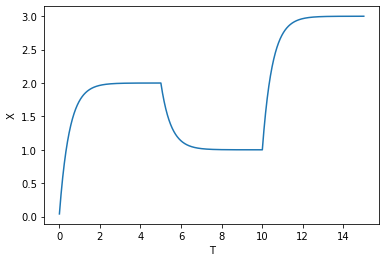

In [68]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots graph of the effects of X over time

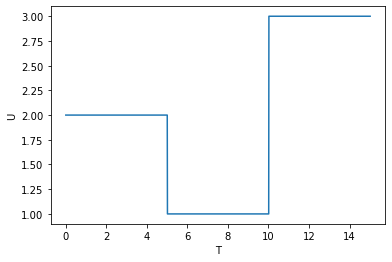

In [69]:
plt2 = sns.lineplot(x="T", y="U", data=df1) # Plots graph on the effect of U Over Time

## Multiplot for Report 

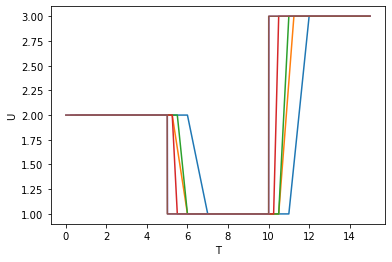

In [70]:
df2 = Eulers(0,0,1,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df3 = Eulers(0,0,0.75,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df4 = Eulers(0,0,0.5,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df5 = Eulers(0,0,0.25,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df6 = Eulers(0,0,0.01,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
df7 = Eulers(0,0,0.001,15,0) # Perform the Eulers method on those parameters and return a pandas dataframe
plt3 = sns.lineplot(x="T", y="U", data=df2) #blue 1
plt4 = sns.lineplot(x="T", y="U", data=df3) #Orange 0.75
plt5 = sns.lineplot(x="T", y="U", data=df4) #Green 0.5
plt6 = sns.lineplot(x="T", y="U", data=df5) #Red 0.25
plt7 = sns.lineplot(x="T", y="U", data=df6) #Purple 0.01
plt8 = sns.lineplot(x="T", y="U", data=df7) #Brown 0.001

(Returns as Pandas Dataframe)

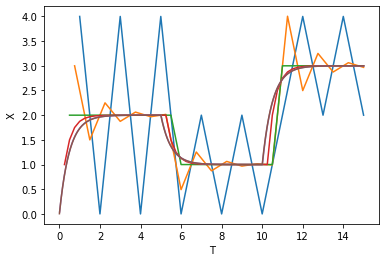

In [71]:
plt9 = sns.lineplot(x="T", y="X", data=df2) #Blue 1
plt10 = sns.lineplot(x="T", y="X", data=df3) #Orange 0.75
plt11 = sns.lineplot(x="T", y="X", data=df4) #Green 0.5
plt12 = sns.lineplot(x="T", y="X", data=df5) #Red 0.25
plt13 = sns.lineplot(x="T", y="X", data=df6) #Purple 0.01
plt14 = sns.lineplot(x="T", y="X", data=df7) #Brown 0.001

## Actual Plot

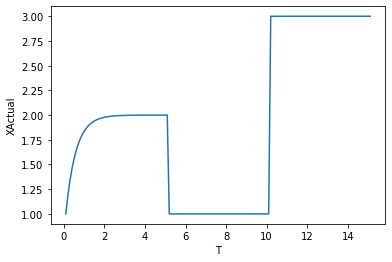

In [72]:
dfactual2 = Actualplot (0,0,0.1,15) #plot the actual value of Initialx: 0, InitialY:0, Step: 0.1, time:15
Actualplt = sns.lineplot(x="T", y="XActual", data=dfactual2)  #plot actual results

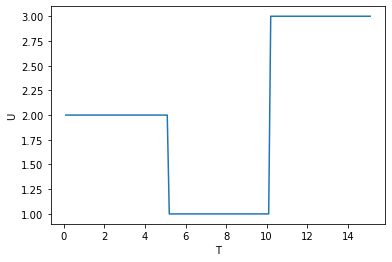

In [73]:
Actualplt = sns.lineplot(x="T", y="U", data=dfactual2)  #plot actual results

# Part 2: Adding Noise to Simulation

## Box Muller Algorithm

In [74]:
standarddev = 0.01 #Target Standard Deviation
meanx = 0 # Target Mean
noise = [] #Noise array
distz1 = [] # Array of distribution of random numbers without modification
distb = [] #Slight modification of random numbers
distz2 = [] #First Set of Random Numbers
distz3 = [] #Second Set of Random Numbers

for ind in df1.index: # For each record in the dataframe
        z1 = random.uniform(0,2*np.pi) # generate a random number between 0 and 2*pi
        distz1.append(z1) # append random numbers to z1 array
        
        #generate a random number between 0 and 1 uniformally generated
        b = standarddev*math.sqrt(-2*math.log(random.uniform(0,1))) 
        distb.append(b) # append unformly generated numbers to array
        
        # calulate the sin of the first random number using the uniform number
        z2 = b*math.sin(z1)+meanx 
        distz2 = [z2] #add random number 1 to array
        
        # calulate the cos of the Second random number using the uniform number
        z3 = b*math.cos(z1)+meanx
        distz3 = [z3] #add random number 2 to array
        
        Xnoise = z2 
        Xnoise2 = z3 

        noise.append(Xnoise)# Add random number 1 to Xnoise
        noise.append(Xnoise2)# Add random number 2 to Xnoise

In [75]:
def BoxMuller (dataframe):
    standarddev = 0.1 #Target Standard Deviation
    meanx = 0 # Target Mean
    noise = [] #Noise array
    distz1 = [] # Array of distribution of random numbers without modification
    distb = [] #Slight modification of random numbers
    distz2 = [] #First Set of Random Numbers
    distz3 = [] #Second Set of Random Numbers

    for ind in dataframe.index: # For each record in the dataframe
            z1 = random.uniform(0,2*np.pi) # generate a random number between 0 and 2*pi
            distz1.append(z1) # append random numbers to z1 array
        
            #generate a random number between 0 and 1 uniformally generated
            b = standarddev*math.sqrt(-2*math.log(random.uniform(0,1))) 
            distb.append(b) # append unformly generated numbers to array
        
            # calulate the sin of the first random number using the uniform number
            z2 = b*math.sin(z1)+meanx 
            distz2 = [z2] #add random number 1 to array
        
            # calulate the cos of the Second random number using the uniform number
            z3 = b*math.cos(z1)+meanx
            distz3 = [z3] #add random number 2 to array
        
            Xnoise = z2 
            Xnoise2 = z3 

            noise.append(Xnoise)# Add random number 1 to Xnoise
            noise.append(Xnoise2)# Add random number 2 to Xnoise
    return noise

## Distribution Plots of Random Numbers 

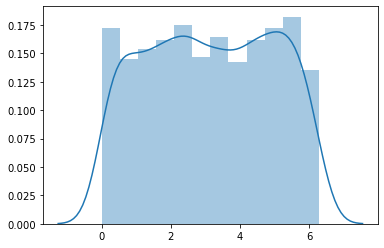

In [76]:
sns.distplot(distz1) #Distribution of random numbers before box muller

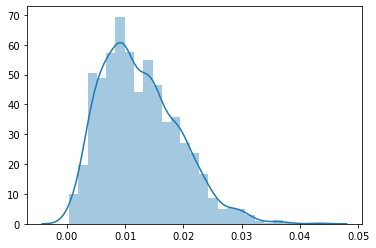

In [77]:
sns.distplot(distb) #Distribution of Random Uniform Numbers between 0 and 1

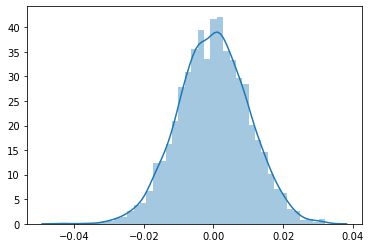

In [78]:
sns.distplot(noise) #Distribution of Standardised Numbers

## Add Noise to Dataframe

In [79]:
dfnoise = pd.DataFrame(noise) #Add noise to dataframe
dfnoise.columns =['Noise'] #Rename Col to Noise
dfcount = df1['X'].count() # Find count of x (how many in dataframe)
# add to dataframe the number of records in dataframe
dfnoiseshortened = dfnoise[dfnoise["Noise"].index < dfcount] 
df1['Noise'] = dfnoiseshortened # append noise to original dataframe
df1 #show dataframe

,T,X,U,Noise
0,0.01,0.040000,2.0,0.021684
1,0.02,0.079200,2.0,0.000971
2,0.03,0.117616,2.0,0.006838
3,0.04,0.155264,2.0,-0.018941
4,0.05,0.192158,2.0,-0.012042
...,...,...,...,...
1496,14.97,2.999911,3.0,0.000704
1497,14.98,2.999913,3.0,0.019088
1498,14.99,2.999915,3.0,0.002980
1499,15.00,2.999916,3.0,0.008192


In [80]:
XcombinedNoise =  df1['Noise'] + df1['X'] # Add Noise to the X value
df1['xNoise'] = XcombinedNoise # Add XNoise to dataframe
df1 #Display Dataframe

,T,X,U,Noise,xNoise
0,0.01,0.040000,2.0,0.021684,0.061684
1,0.02,0.079200,2.0,0.000971,0.080171
2,0.03,0.117616,2.0,0.006838,0.124454
3,0.04,0.155264,2.0,-0.018941,0.136323
4,0.05,0.192158,2.0,-0.012042,0.180117
...,...,...,...,...,...
1496,14.97,2.999911,3.0,0.000704,3.000615
1497,14.98,2.999913,3.0,0.019088,3.019001
1498,14.99,2.999915,3.0,0.002980,3.002894
1499,15.00,2.999916,3.0,0.008192,3.008108


## Calculate Average Percentage of Noise Generated 

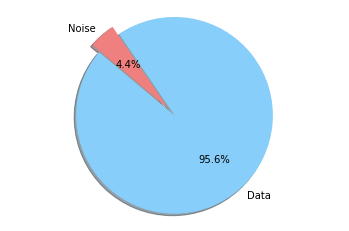

In [81]:
Noise = df1['Noise'] #fetch noise values
X = df1['X'] #Fetch x values 
perc =abs( (Noise/X *100)) # Calculate percentage x 
df1['PercentageNoise'] = perc #add percentage to dataframe
Noise2 = BoxMuller(df1)
Noise3 = BoxMuller(df1)
Noise4 = BoxMuller(df1)
Noise5 = BoxMuller(df1)
dfnoise2 = pd.DataFrame(Noise2)
dfnoise3 = pd.DataFrame(Noise3)
dfnoise4 = pd.DataFrame(Noise4)
dfnoise5 = pd.DataFrame(Noise5)
dfnoise2.columns =['Noise2']
dfnoise3.columns =['Noise3']
dfnoise4.columns =['Noise4']
dfnoise5.columns =['Noise5']
countave = df1['X'].count()
Shortened2 = dfnoise2[dfnoise2["Noise2"].index < countave]
Shortened3 = dfnoise3[dfnoise3["Noise3"].index < countave]
Shortened4 = dfnoise4[dfnoise4["Noise4"].index < countave]
Shortened5 = dfnoise5[dfnoise5["Noise5"].index < countave]
df1['Noise2'] = Shortened2
df1['Noise3'] = Shortened3
df1['Noise4'] = Shortened4
df1['Noise5'] = Shortened5
Xcomb2 =  df1['Noise2'] + df1['X']
Xcomb3 =  df1['Noise3'] + df1['X']
Xcomb4 =  df1['Noise4'] + df1['X']
Xcomb5 =  df1['Noise5'] + df1['X']
df1['xNoise2'] = Xcomb2 
df1['xNoise3'] = Xcomb3 
df1['xNoise4'] = Xcomb4 
df1['xNoise5'] = Xcomb5 
Noise2 = df1['Noise2'] #fetch noise values
Noise3 = df1['Noise3'] #fetch noise values
Noise4 = df1['Noise4'] #fetch noise values
Noise5 = df1['Noise5'] #fetch noise values
X = df1['X'] #Fetch x values 
X2 = df1['X'] #Fetch x values 
X3 = df1['X'] #Fetch x values 
X4 = df1['X'] #Fetch x values 

perc2 =abs( (Noise2/X *100)) # Calculate percentage x 
perc3 =abs( (Noise3/X2 *100)) # Calculate percentage x 
perc4 =abs( (Noise4/X3 *100)) # Calculate percentage x 
perc5 =abs( (Noise5/X4 *100)) # Calculate percentage x 
df1['PercentageNoise2'] = perc2 #add percentage to dataframe
df1['PercentageNoise3'] = perc3 #add percentage to dataframe
df1['PercentageNoise4'] = perc4 #add percentage to dataframe
df1['PercentageNoise5'] = perc5 #add percentage to dataframe

data1 = df1['PercentageNoise'].mean()
data2 = df1['PercentageNoise2'].mean()
data3 = df1['PercentageNoise3'].mean()
data4 = df1['PercentageNoise4'].mean()
data5 = df1['PercentageNoise5'].mean()

percentageave = data1 + data2 + data3 + data4 + data5
percentageave = percentageave /5
whole = 100 - percentageave

labels = 'Data', 'Noise' # set the titles for each section
sizes = [whole, percentageave]
colors = ['lightskyblue', 'lightcoral'] #set the colours 
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140) #set the angles

plt.axis('equal')
plt.show() #show the pie chart

df1 = df1.drop(['Noise','Noise2', 'Noise3','Noise4','Noise5','xNoise2', 'xNoise3','xNoise4', 'xNoise5','PercentageNoise2', 'PercentageNoise3','PercentageNoise4', 'PercentageNoise5', 'PercentageNoise'], axis=1)


## Display affects on noise to X

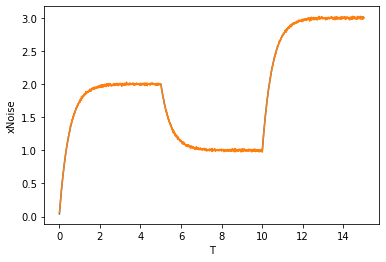

In [82]:
#Plot Effect Noise had on X (Increasing std to 0.1 makes the effect more evident)
Noiseplt = sns.lineplot(x="T", y="X", data=df1)
Noiseplt = sns.lineplot(x="T", y="xNoise", data=df1) 

### Add Noisex to all step size dataframes

In [83]:
noise2 = BoxMuller(df2) # Make Noise for Df2 (Step Size:1) 
dfnoise2 = pd.DataFrame(noise2) #Append Noise to dataframe
dfnoise2.columns =['Noise'] # Rename col to Noise
dfcount2 = df2['X'].count() #Get the count of X (number of entries)
dfnoiseshortened2 = dfnoise2[dfnoise2["Noise"].index < dfcount2] #Half the data to fit the full dataframe
df2['Noise'] = dfnoiseshortened2 # add noise to full dataframe
XcombinedNoise2 =  df2['Noise'] + df2['X'] # add noise to x
df2['xNoise'] = XcombinedNoise2  #add Xnoise to dataframe

noise3 = BoxMuller(df3) # Make Noise for Df3 (Step Size:0.75) 
dfnoise3 = pd.DataFrame(noise3) #Append Noise to dataframe
dfnoise3.columns =['Noise'] # Rename col to Noise
dfcount3 = df3['X'].count() #Get the count of X (number of entries)
dfnoiseshortened3 = dfnoise3[dfnoise3["Noise"].index < dfcount3]  #Half the data to fit the full dataframe
df3['Noise'] = dfnoiseshortened3 # add noise to full dataframe
XcombinedNoise3 =  df3['Noise'] + df3['X'] # add noise to x
df3['xNoise'] = XcombinedNoise3 #add Xnoise to dataframe

noise4 = BoxMuller(df4) # Make Noise for Df4 (Step Size:0.5) 
dfnoise4 = pd.DataFrame(noise4) #Append Noise to dataframe
dfnoise4.columns =['Noise'] # Rename col to Noise
dfcount4 = df4['X'].count() #Get the count of X (number of entries)
dfnoiseshortened4 = dfnoise4[dfnoise4["Noise"].index < dfcount4]  #Half the data to fit the full dataframe
df4['Noise'] = dfnoiseshortened4 # add noise to full dataframe
XcombinedNoise4 =  df4['Noise'] + df4['X'] # add noise to x
df4['xNoise'] = XcombinedNoise4 #add Xnoise to dataframe

noise5 = BoxMuller(df5) # Make Noise for Df5 (Step Size: 0.25) 
dfnoise5 = pd.DataFrame(noise5) #Append Noise to dataframe
dfnoise5.columns =['Noise'] # Rename col to Noise
dfcount5 = df5['X'].count() #Get the count of X (number of entries)
dfnoiseshortened5 = dfnoise5[dfnoise5["Noise"].index < dfcount5]  #Half the data to fit the full dataframe
df5['Noise'] = dfnoiseshortened5 # add noise to full dataframe
XcombinedNoise5 =  df5['Noise'] + df5['X'] # add noise to x
df5['xNoise'] = XcombinedNoise5 #add Xnoise to dataframe

noise6 = BoxMuller(df6) # Make Noise for Df6 (Step Size:0.01) 
dfnoise6 = pd.DataFrame(noise6) #Append Noise to dataframe
dfnoise6.columns =['Noise'] # Rename col to Noise
dfcount6 = df6['X'].count() #Get the count of X (number of entries)
dfnoiseshortened6 = dfnoise6[dfnoise6["Noise"].index < dfcount6] #Half the data to fit the full dataframe
df6['Noise'] = dfnoiseshortened6 # add noise to full dataframe
XcombinedNoise6 =  df6['Noise'] + df6['X'] # add noise to x
df6['xNoise'] = XcombinedNoise6 #add Xnoise to dataframe

noise7 = BoxMuller(df7) # Make Noise for Df7 (Step Size:0.001) 
dfnoise7 = pd.DataFrame(noise7) #Append Noise to dataframe
dfnoise7.columns =['Noise'] # Rename col to Noise
dfcount7 = df7['X'].count() #Get the count of X (number of entries)
dfnoiseshortened7 = dfnoise7[dfnoise7["Noise"].index < dfcount7] #Half the data to fit the full dataframe
df7['Noise'] = dfnoiseshortened7 # add noise to full dataframe
XcombinedNoise7 =  df7['Noise'] + df7['X'] # add noise to x
df7['xNoise'] = XcombinedNoise7 #add Xnoise to dataframe

In [84]:
arrayofdata = df1['xNoise'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
arrayofdata2 = np.asarray(arrayofdata,dtype=np.float64)
arrayofdata2 = arrayofdata2.reshape(-1, 1)
x_scaled = min_max_scaler.fit_transform(arrayofdata2)
df1['Normalisedx'] = x_scaled

In [85]:
df1

,T,X,U,xNoise,Normalisedx
0,0.01,0.040000,2.0,0.061684,0.000000
1,0.02,0.079200,2.0,0.080171,0.006240
2,0.03,0.117616,2.0,0.124454,0.021188
3,0.04,0.155264,2.0,0.136323,0.025194
4,0.05,0.192158,2.0,0.180117,0.039977
...,...,...,...,...,...
1496,14.97,2.999911,3.0,3.000615,0.992034
1497,14.98,2.999913,3.0,3.019001,0.998241
1498,14.99,2.999915,3.0,3.002894,0.992804
1499,15.00,2.999916,3.0,3.008108,0.994564


# Part 3: Predicting the Robot

## Step Function Perceptron

In [86]:
def SelectedEpoch(Epochnum,PerceptonOutput): #Method to select and add to dataframe which epoch to plot
    totalvalues = df1['X'].count() #Get the count of the x values of the dataframe
    count = -1 # initialise count at -1 so you can start writing at 0
    latch = False # set latch to false
    ChosenEpoch = [] # declare chosen Epoch
    delete = Epochnum*totalvalues - totalvalues #Declare the startpoint of epoch
    delete2 = Epochnum*totalvalues #Declare finish point of epoch
    for x in PerceptonOutput: # loop around the data outputted by the perceptron
        count = count +1 # increase count
        if count == delete: # if count is at startpoint set latch to true so it can write
            latch = True 
        if count == delete2: # if count is at finishpoint set latch to False so it cant write
            latch = False 
        if latch == True: # if latch is true append the x value to the epoch array 
            ChosenEpoch.append(x) 
    return ChosenEpoch #return the data from that epoch

    
def train_weights_step(array, lr, Epochs2): #Method for step activation
    Weight = [-0.10,random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] # initialise 3 weights and 3 bias weights 
    for Epoch2 in range(Epochs2): #for each epoch
        sumerr = 0.0
        if (Epoch2 ==0  ):
            Output = [] #delcare the output array
            errorarr = []
            updated_weight = []
            count = 0 # Declare position 0 
            for x in array:# for each value in epoch array
                updated_weight.append([Weight[0],Weight[1],Weight[2],Weight[3]])
                prediction = predict(x,Weight) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                Weight[0] = Weight[0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    Weight[i + 1] = Weight[i +1] + Weight_change #update weight
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
        else: 
            countweight = 0
            for x in array:# for each value in epoch array            
                prediction = predict(x,updated_weight[countweight]) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                updated_weight[countweight][0] = updated_weight[countweight][0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    updated_weight[countweight][i+1] = updated_weight[countweight][i+1] + Weight_change #update weight
                countweight = countweight +1
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
    return Output #return data    
    

def predict(xn2, weightn2): #Declare the perceptron 
    activation = 0  #set the default activation to 0 
    activation = weightn2[0]
    for i in range(len(xn2)-1):
        activation = activation + weightn2[i+1]*xn2[i] #times the wight by x and add it to activation 
    return 1 if activation <= 0 else 0 # if the result of the activation is greater than or equal to0.5 return true else false

def Tuple_converter(array): #convert array into a tuple set 
    Tuplearray = [] #declare array for results
    count = 0 # set count to 0
    while count < len(array): #if count is less than the array length loop
        if count == 0: #if count is at 0 add 2 0s to the first entry
            Tuplearray.append([0,0,array[count]]) 
        elif count == 1: #if count is 1 add 1 0 to the second entry
            Tuplearray.append([0,array[count],array[count-1]])
        else: #else extablish a pattern where the first result is the last result in tuples
            Tuplearray.append([array[count],array[count-1],array[count-2]])
        count = count + 1 # increase count 
    return Tuplearray # return tuple 

>epoch=0, lrate=0.010, error=264.627
>epoch=1, lrate=0.010, error=264.640
>epoch=2, lrate=0.010, error=253.647
>epoch=3, lrate=0.010, error=257.508
>epoch=4, lrate=0.010, error=253.527
>epoch=5, lrate=0.010, error=254.321
>epoch=6, lrate=0.010, error=250.654
>epoch=7, lrate=0.010, error=252.237
>epoch=8, lrate=0.010, error=258.404
>epoch=9, lrate=0.010, error=253.439


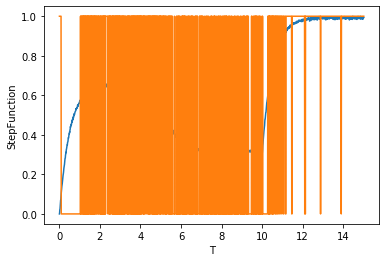

In [105]:
x1 = Tuple_converter(df1['Normalisedx'])
Stepfunction = train_weights_step(x1,0.01,10)
stepfunction2 = SelectedEpoch(10,Stepfunction)
df1['StepFunction'] = stepfunction2
t = sns.lineplot(x="T", y="Normalisedx", data=df1)  #plot actual
t2 = sns.lineplot(x="T", y="StepFunction", data=df1) #plot predicted


## Sigmoid Function Perceptron

In [116]:
def sigmoid_activation(val): #declare sigmoid activation function
    sigmoid = 1/1+np.exp(-val) # Calculate sigmoid
    return sigmoid #return result

def train_weights_sigmoid(array, lr, Epochs2): #Method for sigmoid activation
    Weight = [-0.10,random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)] # initialise 3 weights and 3 bias weights 
    for Epoch2 in range(Epochs2): #for each epoch
        sumerr = 0.0
        if (Epoch2 == 0  ):
            Output = [] #delcare the output array
            errorarr = []
            updated_weight = []
            count = 0 # Declare position 0 
            for x in array:# for each value in epoch array
                updated_weight.append([Weight[0],Weight[1],Weight[2],Weight[3]])
                prediction, netwrk_sum = predict3(x,Weight) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                Weight[0] = Weight[0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    Weight[i + 1] = Weight[i +1] + Weight_change #update weight
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
        else: 
            countweight = 0
            for x in array:# for each value in epoch array            
                prediction, netwrk_sum = predict3(x,updated_weight[countweight]) # complete prediction on result
                if count == 0: # change target for weight
                    Target = x[2]
                elif count==1: # change target for weight
                    Target = x[1]
                else: #change target for weight
                    Target = x[0]
                delta = Target - prediction #Calculate delta
                error = delta # set error to delta
                errorarr.append(error)
                Output.append(prediction) # append prediction 
                Weight_change_bias= -x[0]*lr*error # calculate new bias weight
                updated_weight[countweight][0] = updated_weight[countweight][0] + Weight_change_bias # change the bias weight
                Weight_change= -x[0]*lr*error # calculate weight change 
                for i in range(len(x)):  # for each item in the tuple update weigt
                    updated_weight[countweight][i+1] = updated_weight[countweight][i+1] + Weight_change #update weight
                countweight = countweight +1
                sumerr +=error**2
                count = count + 1 # increment count
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (Epoch2, lr, sumerr))
    return Output,errorarr #return data


def predict3(noise2b,weights2):
    net_sum = 0
    net_sum = weights2[0]
    for i in range(len(noise2b)-1):
        net_sum += weights2[i + 1] * noise2b[i]
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum

>epoch=0, lrate=0.010, error=451.238
>epoch=1, lrate=0.010, error=451.264
>epoch=2, lrate=0.010, error=450.534
>epoch=3, lrate=0.010, error=449.812
>epoch=4, lrate=0.010, error=449.097
>epoch=5, lrate=0.010, error=448.389
>epoch=6, lrate=0.010, error=447.688
>epoch=7, lrate=0.010, error=446.993
>epoch=8, lrate=0.010, error=446.306
>epoch=9, lrate=0.010, error=445.624


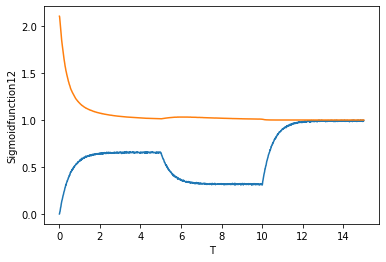

In [122]:
x12 = Tuple_converter(df1['Normalisedx'])
Sigmoidfunction2,tttt = train_weights_sigmoid(x12,0.01,10)
Sigmoidfunction3 = SelectedEpoch(10,Sigmoidfunction2)
df1['Sigmoidfunction12'] = Sigmoidfunction3
t = sns.lineplot(x="T", y="Normalisedx", data=df1)  #plot actual
t2 = sns.lineplot(x="T", y="Sigmoidfunction12", data=df1) #plot predicted

## Learning Rates Sigmoid Perceptron

>epoch=0, lrate=0.010, error=119.327


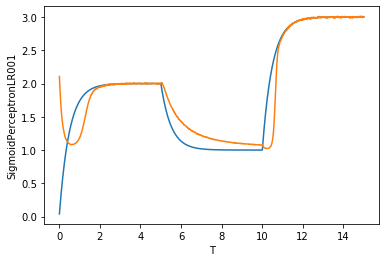

In [118]:
xLR001 = Tuple_converter(df1['xNoise'])
SigmoidPerceptronLR001,ttt = train_weights_sigmoid(xLR001,0.01,1) #Train Perceptron using learning rate 0.01
df1['SigmoidPerceptronLR001'] = SigmoidPerceptronLR001 # add learning rate 0.01 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR001", data=df1) #plot predicted 

>epoch=0, lrate=0.100, error=4081.780


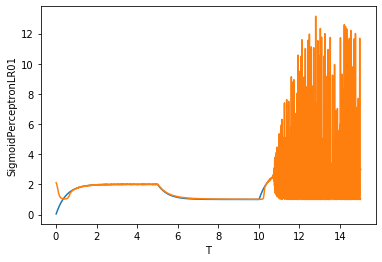

In [119]:
xLR01 = Tuple_converter(df1['xNoise'])
SigmoidPerceptronLR01,tttt = train_weights_sigmoid(xLR01,0.1,1) #Train Perceptron using learning rate 0.1
df1['SigmoidPerceptronLR01'] = SigmoidPerceptronLR01 # add learning rate 0.1 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR01", data=df1) #plot predicted 

>epoch=0, lrate=0.001, error=452.890


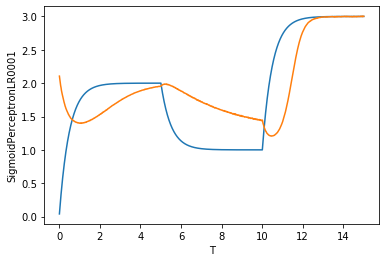

In [120]:
xLR025 = Tuple_converter(df1['xNoise'])
SigmoidPerceptronLR025,ttttt = train_weights_sigmoid(xLR025,0.001,1) #Train Perceptron using learning rate 0.25
df1['SigmoidPerceptronLR0001'] = SigmoidPerceptronLR025 # add learning rate 0.25 to dataframe
Noiseplt = sns.lineplot(x="T", y="X", data=df1)  # plot actual
Stepplt = sns.lineplot(x="T", y="SigmoidPerceptronLR0001", data=df1) #plot predicted 